The following is on clustering:

   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   

        Date  
0 1995-01-01  
1 1995-01-02  
2 1995-01-03  
3 1995-01-04  
4 1995-01-05  
Date
1995-01-31    51.419355
1995-02-28    54.800000
1995-03-31    55.000000
1995-04-30    57.193333
1995-05-31    67.409677
Freq: M, Name: AvgTemperature, dtype: float64


<ipython-input-2-53c38f0ca7f5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  algiers_data['Date'] = pd.to_datetime(algiers_data['Date'])


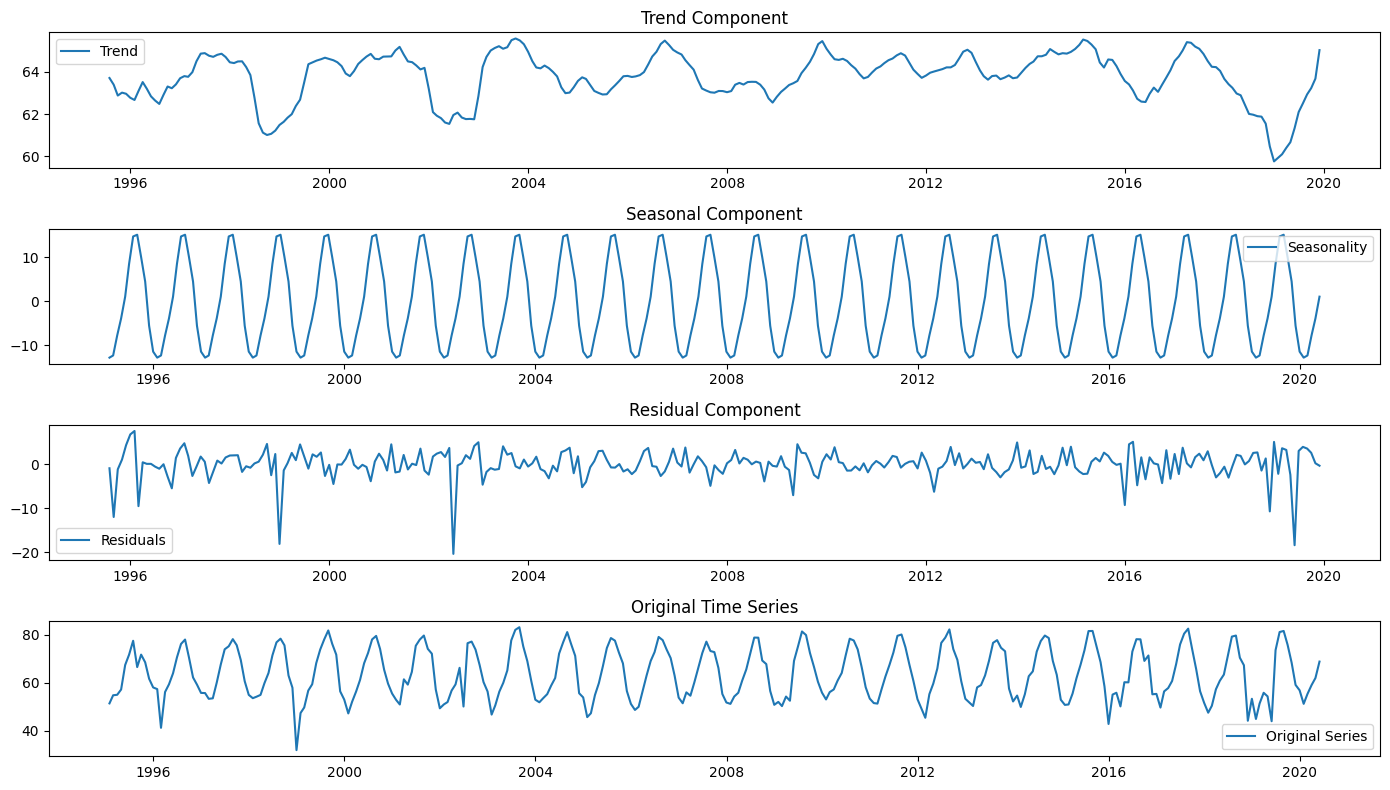

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data from the Excel file
file_path = '/content/small_city_temp.xlsx'
data = pd.read_excel(file_path)

# Displaying the first few rows to understand the structure of the dataset
print(data.head())

# Filtering the dataset for the city of Algiers
# This step selects only those rows where the 'City' column is 'Algiers'
algiers_data = data[data['City'] == 'Algiers']

# Converting the 'Date' column to datetime format and setting it as the index
# This is important for time series analysis as it allows for easy resampling and indexing by date
algiers_data['Date'] = pd.to_datetime(algiers_data['Date'])
algiers_data = algiers_data.set_index('Date')

# Resampling the data to get the average temperature for each month
# The 'M' in resample('M') stands for 'Month', and 'mean()' calculates the average
monthly_avg_temp = algiers_data['AvgTemperature'].resample('M').mean()
import pandas as pd

# Assuming you have a DataFrame 'algiers_data' with a datetime index and 'AvgTemperature' column
# resample the data to monthly frequency and calculate the mean temperature
monthly_avg_temp = algiers_data['AvgTemperature'].resample('M').mean()

# Calculate the median temperature for each month
monthly_median_temp = algiers_data['AvgTemperature'].resample('M').median()

# Calculate the minimum and maximum temperatures for each month
monthly_min_temp = algiers_data['AvgTemperature'].resample('M').min()
monthly_max_temp = algiers_data['AvgTemperature'].resample('M').max()

# Calculate the standard deviation and variance of temperatures for each month
monthly_std_temp = algiers_data['AvgTemperature'].resample('M').std()
monthly_var_temp = algiers_data['AvgTemperature'].resample('M').var()

# Calculate the sum of temperatures for each month
monthly_sum_temp = algiers_data['AvgTemperature'].resample('M').sum()

# Calculate the 25th and 75th percentiles (1st and 3rd quartiles) of temperatures for each month
monthly_25th_percentile = algiers_data['AvgTemperature'].resample('M').quantile(0.25)
monthly_75th_percentile = algiers_data['AvgTemperature'].resample('M').quantile(0.75)

# Count the number of data points (observations) in each month
monthly_count = algiers_data['AvgTemperature'].resample('M').count()

# Calculate the range of temperatures (difference between max and min) for each month
monthly_range_temp = monthly_max_temp - monthly_min_temp

# Display or use the calculated metrics as needed
# Displaying the first few rows of the resampled data
print(monthly_avg_temp.head())

# Decomposing the time series using Seasonal Decomposition of Time Series (STL)
# This breaks down the time series into three components: trend, seasonality, and residuals (noise)
# 'model="additive"' is used because we assume that the components are added together to make the time series
# 'period=12' because we expect yearly seasonality in temperature data
decomposition = seasonal_decompose(monthly_avg_temp, model='additive', period=12)

# Plotting the decomposed components
plt.figure(figsize=(14, 8))

# Trend component
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# Seasonal component
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')

# Residual component
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')

# Original series
plt.subplot(414)
plt.plot(monthly_avg_temp, label='Original Series')
plt.legend(loc='best')
plt.title('Original Time Series')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

'''
Let's evaluate each of these values in terms of whether higher or lower is generally considered better:

1. **R-squared (0.613)**: Higher is better. This value suggests the model explains 61.3% of the variability in the data. Higher values indicate a better fit.

2. **Adjusted R-squared (0.612)**: Higher is better, similar to R-squared. It adjusts for the number of predictors, so a high value is desirable as it indicates a good model fit considering the number of variables used.

3. **F-statistic (3261)**: Higher is generally better. A high F-statistic suggests the model is statistically significant.

4. **Prob (F-statistic)**: Lower is better. A value close to 0, as in this case, indicates the model's statistical significance is high, meaning it's highly unlikely the model's results are due to random chance.

5. **Coefficients (coef)**:
   - **MedInc, HouseAge, AveBedrms**: Higher coefficients indicate a stronger positive relationship with the dependent variable.
   - **AveRooms, Population, AveOccup, Latitude, Longitude**: The interpretation of better high or low depends on the context and the expected relationship direction between these variables and the dependent variable.

6. **P-values**: Lower is better. Values less than 0.05 generally indicate statistical significance of the corresponding coefficients.

7. **Omnibus, Skew, and Kurtosis**: These are tests for the normality of residuals. Ideally, you want the Omnibus test to have a higher p-value (indicating normal distribution), and the Skew and Kurtosis closer to zero for a normal distribution.

8. **Condition Number (2.38e+05)**: Lower is better. A high condition number indicates potential multicollinearity, which can be problematic.

9. **Model Performance Metrics**:
   - **Mean Squared Error (0.5558915986952444)**: Lower is better. It indicates the average squared difference between the estimated values and the actual value. A lower MSE indicates a model with better predictive accuracy.
   - **R-squared (0.5757877060324508)**: Higher is better. This value, likely calculated on the test dataset, suggests the extent to which the model explains the variability in the data. Higher values are indicative of a better fit.

In summary, for most of these metrics, higher values are better for R-squared and Adjusted R-squared, and lower values are better for p-values, Prob (F-statistic), and MSE. The interpretation of coefficients depends on the expected direction of influence on the dependent variable. The condition number should be lower to avoid multicollinearity issues.
'''


The following is for when you want to dowhat was done above, but with axes

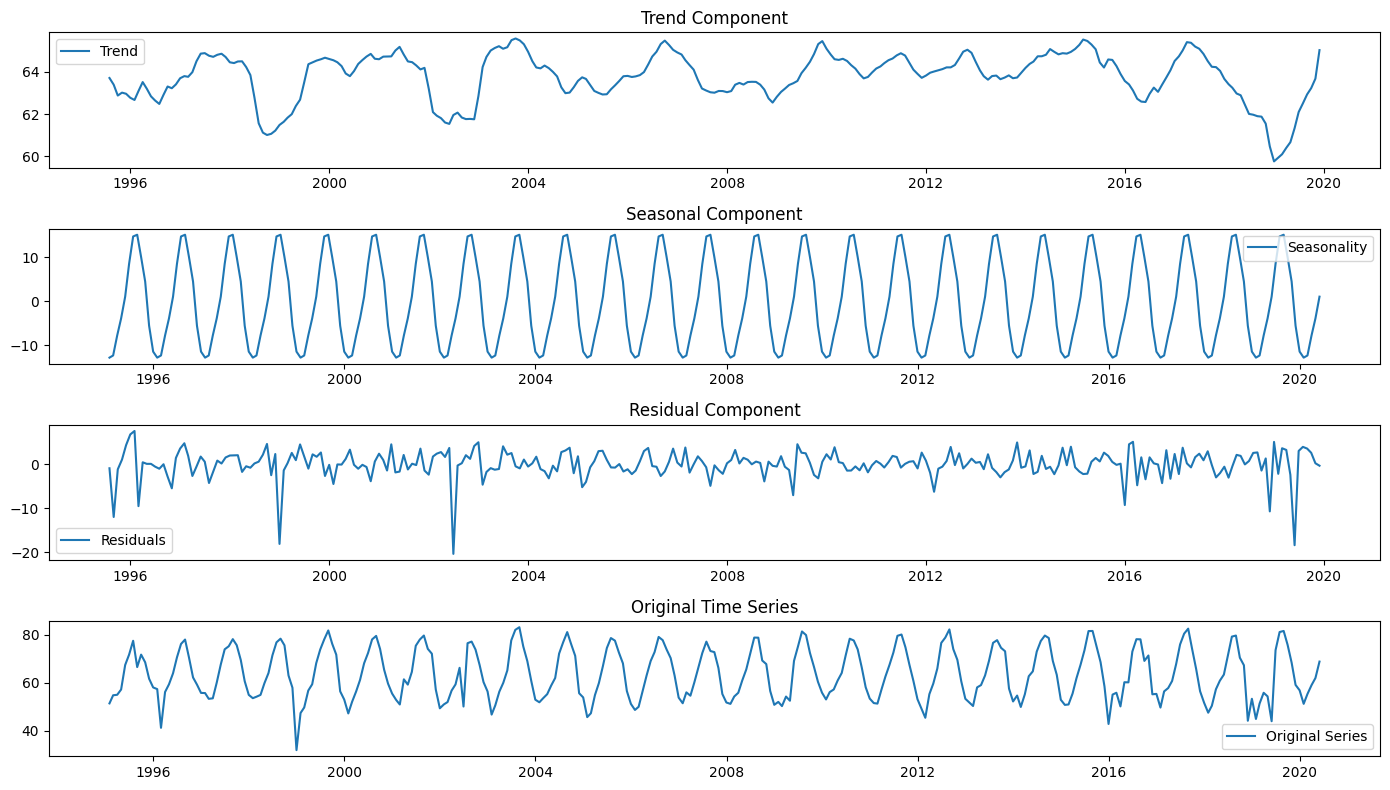

In [ ]:
# Decomposing the time series
decomposition = seasonal_decompose(monthly_avg_temp, model='additive', period=12)

# Creating a figure and an array of axes (subplots)
fig, axes = plt.subplots(4, 1, figsize=(14, 8))

# Plotting the trend component
axes[0].plot(decomposition.trend, label='Trend')
axes[0].legend(loc='best')
axes[0].set_title('Trend Component')

# Plotting the seasonal component
axes[1].plot(decomposition.seasonal, label='Seasonality')
axes[1].legend(loc='best')
axes[1].set_title('Seasonal Component')

# Plotting the residual component
axes[2].plot(decomposition.resid, label='Residuals')
axes[2].legend(loc='best')
axes[2].set_title('Residual Component')

# Plotting the original series
axes[3].plot(monthly_avg_temp, label='Original Series')
axes[3].legend(loc='best')
axes[3].set_title('Original Time Series')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

The following is for clustering

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


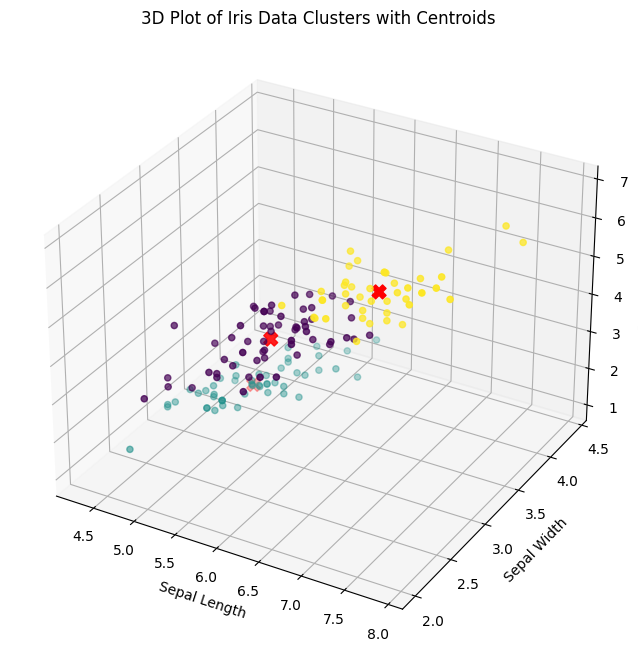

Adjusted Rand Index: 0.7021065635057377
Predicted Cluster for new input: 1


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Loading the Iris dataset
iris_data = pd.read_csv('/content/iris.txt', delimiter=',')

# Selecting the input features for clustering: sepal_length, sepal_width, and petal_length
X = iris_data[['sepal_length', 'sepal_width', 'petal_length']]


# Performing K-means clustering with 3 clusters
# you do not need to add n_init,
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

# Predicting the cluster labels for the dataset
cluster_labels = kmeans.labels_

# Since the true labels are available in the 'species' column, they can be used for evaluation
# Converting species to numerical labels for comparison
true_labels = pd.factorize(iris_data['species'])[0]

# Calculating the Adjusted Rand Index (ARI) for the clustering performance
ari = adjusted_rand_score(true_labels, cluster_labels)

# Predicting the cluster for new input data: sepal_length = 6.1, sepal_width = 3.0, petal_length = 0.8
predicted_cluster = kmeans.predict([[6.1, 3.0, 0.8]])[0]

# Creating a 3D plot for visualizing the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points, colored by their cluster label
ax.scatter(X['sepal_length'], X['sepal_width'], X['petal_length'], c=cluster_labels, cmap='viridis')

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=100, c='red', marker='X')

# Adding labels and title to the plot
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Plot of Iris Data Clusters with Centroids')

# Showing the plot
plt.show()

# Displaying the ARI and the predicted cluster for the new input
print("Adjusted Rand Index:", ari)
print("Predicted Cluster for new input:", predicted_cluster)


**How to Improve the Clustering Outcome**

To improve the clustering outcome, consider the following approaches:

Feature Scaling: Applying standardization or normalization to the features can improve the performance of K-means, especially when the features are on different scales.
Choosing Optimal Number of Clusters: Use methods like the Elbow method or the Silhouette score to determine the optimal number of clusters.
Feature Selection: Evaluate if all selected features contribute positively to the clustering. Sometimes, removing less informative features can improve the clustering outcome.
Different Clustering Algorithms: Experiment with different clustering algorithms (e.g., hierarchical clustering, DBSCAN) which might be more suitable for the data distribution.
Hyperparameter Tuning: Experiment with different hyperparameters of the K-means algorithm, such as the initialization method or the number of initialization steps.



---
---
---
**Decision Tree Classifier**



Accuracy Score: 0.9747474747474747
Confusion Matrix:
 [[ 79   4]
 [  6 307]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        83
           1       0.99      0.98      0.98       313

    accuracy                           0.97       396
   macro avg       0.96      0.97      0.96       396
weighted avg       0.98      0.97      0.97       396

Plot of Income Against Expenditure


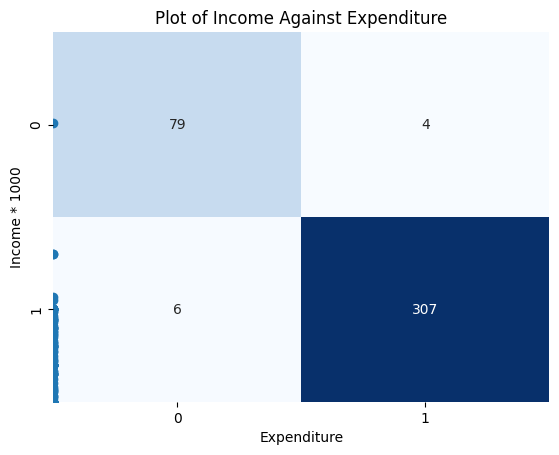

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the DT_creditcard dataset from the Excel file
dt_creditcard_data = pd.read_excel('/content/DT_creditcard.xlsx')

# Selecting the input features ('reports', 'income', 'expenditure') and the target variable ('card')
X = dt_creditcard_data[['reports', 'income', 'expenditure']]
y = dt_creditcard_data['card']

# Encoding the target variable since it's categorical ('yes' and 'no' to 1 and 0)
y = y.map({'yes': 1, 'no': 0})

# Splitting the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating a Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Training the model on the training data
dt_classifier.fit(X_train, y_train)

# Predicting the 'card' decisions for the test data
y_pred = dt_classifier.predict(X_test)

# Evaluating the model's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Creating a confusion matrix to evaluate the model's classification ability
conf_matrix = confusion_matrix(y_test, y_pred)

# Generating a classification report for a detailed performance analysis
class_report = classification_report(y_test, y_pred)

# Displaying the accuracy score, confusion matrix, and classification report
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

print("Classification Report:\n", class_report)


print("Plot of Income Against Expenditure")
# note that first arguement is the x axis, and second is the y axis
plt.scatter(dt_creditcard_data[['expenditure']],dt_creditcard_data[['income']] )
plt.xlabel('Expenditure')
plt.ylabel('Income ')
plt.title('Plot of Income Against Expenditure')
plt.show()


Now it is time to learn about Neural Networks (SVM and MLP) with confusions matrices

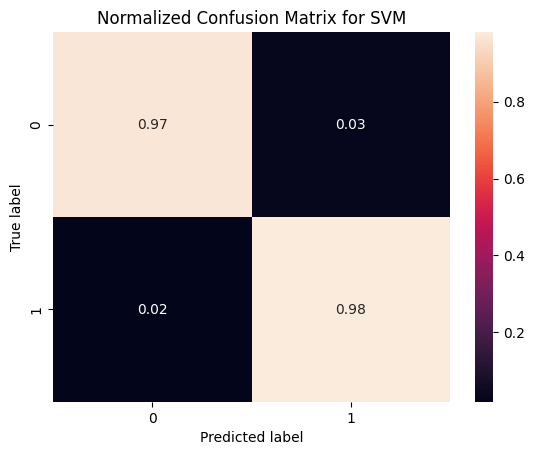

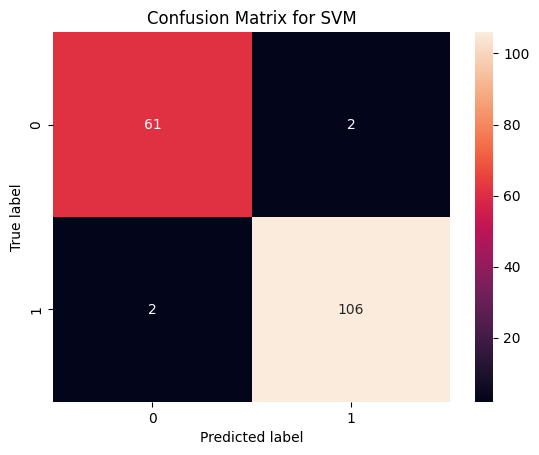

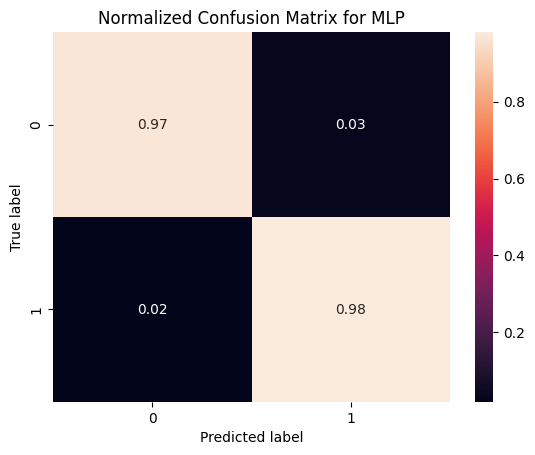

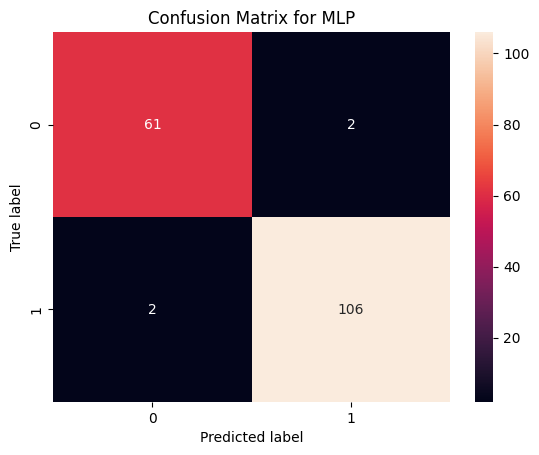

SVM Model Metrics (Accuracy, Precision, Recall, F1-Score): (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815)
MLP Model Metrics (Accuracy, Precision, Recall, F1-Score): (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815)


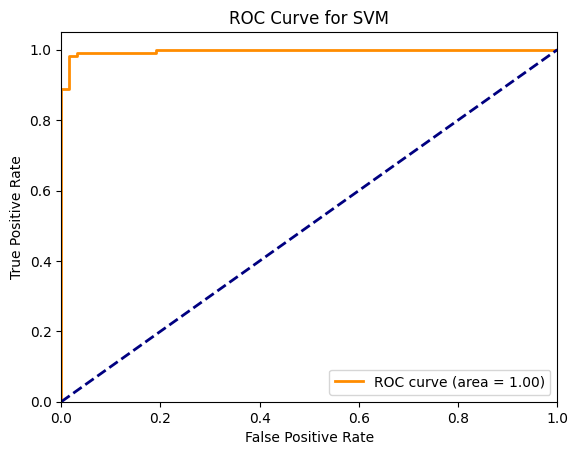

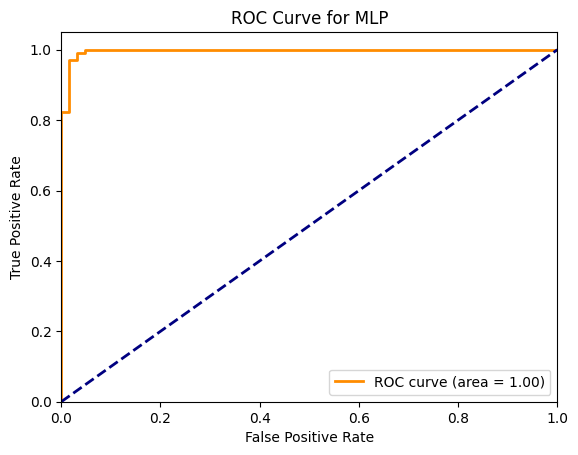

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer_data = datasets.load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)  # Convert the dataset into a Pandas DataFrame for easier manipulation
y = cancer_data.target  # Target variable: 0 for benign, 1 for malignant

# Data preprocessing: Standardize features
scaler = StandardScaler()  # Initialize the StandardScaler
X_scaled = scaler.fit_transform(X)  # Standardize the dataset (mean = 0, variance = 1)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training, 30% test

# SVM model with a linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Initialize the Support Vector Machine model with a linear kernel
svm_model.fit(X_train, y_train)  # Train the model on the training data
svm_pred = svm_model.predict(X_test)  # Predict on the test data

# MLP model with two hidden layers
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)  # Initialize the Multi-Layer Perceptron model with two hidden layers of 100 neurons each
mlp_model.fit(X_train, y_train)  # Train the model on the training data
mlp_pred = mlp_model.predict(X_test)  # Predict on the test data

# Evaluation of both models
def evaluate_model(y_true, y_pred):
    """Function to evaluate the model performance."""
    accuracy = accuracy_score(y_true, y_pred)  # Calculate the accuracy: (true positives + true negatives) / total
    precision = precision_score(y_true, y_pred)  # Calculate the precision: true positives / (true positives + false positives)
    recall = recall_score(y_true, y_pred)  # Calculate the recall: true positives / (true positives + false negatives)
    f1 = f1_score(y_true, y_pred)  # Calculate the F1 score: 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

svm_metrics = evaluate_model(y_test, svm_pred)  # Evaluate the SVM model
mlp_metrics = evaluate_model(y_test, mlp_pred)  # Evaluate the MLP model

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, normalize=False):
    """Function to plot the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred, normalize='true' if normalize else None)  # Compute the confusion matrix
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else 'd')  # Plot the confusion matrix using seaborn
    plt.title(title)  # Set the title of the plot
    plt.ylabel('True label')  # Set the y-axis label
    plt.xlabel('Predicted label')  # Set the x-axis label
    plt.show()

# Plotting confusion matrices for both models (normalized and non-normalized)
plot_confusion_matrix(y_test, svm_pred, 'Normalized Confusion Matrix for SVM', True)
plot_confusion_matrix(y_test, svm_pred, 'Confusion Matrix for SVM', False)
plot_confusion_matrix(y_test, mlp_pred, 'Normalized Confusion Matrix for MLP', True)
plot_confusion_matrix(y_test, mlp_pred, 'Confusion Matrix for MLP', False)

# Displaying the evaluation metrics
print("SVM Model Metrics (Accuracy, Precision, Recall, F1-Score):", svm_metrics)
print("MLP Model Metrics (Accuracy, Precision, Recall, F1-Score):", mlp_metrics)

# Function to plot ROC-AUC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    """Function to plot the ROC-AUC curve."""
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)  # Compute the false positive rate and true positive rate
    roc_auc = auc(fpr, tpr)  # Compute the area under the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot the ROC curve
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])  # Set the x-axis limits
    plt.ylim([0.0, 1.05])  # Set the y-axis limits
    plt.xlabel('False Positive Rate')  # Set the x-axis label
    plt.ylabel('True Positive Rate')  # Set the y-axis label
    plt.title(title)  # Set the title of the plot
    plt.legend(loc="lower right")  # Add a legend to the plot
    plt.show()

# Plotting ROC-AUC curve for both models
plot_roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1], 'ROC Curve for SVM')
plot_roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1], 'ROC Curve for MLP')

# Note: Scatter plot visualization is not included due to the high dimensionality of the dataset.


The ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. Here's what these terms mean:

True Positive Rate (TPR): Also known as sensitivity, recall, or probability of detection. It measures the proportion of actual positives that are correctly identified as such. Calculated as TPR = TP / (TP + FN), where TP is true positives and FN is false negatives.
False Positive Rate (FPR): Measures the proportion of actual negatives that are incorrectly identified as positives. Calculated as FPR = FP / (FP + TN), where FP is false positives and TN is true negatives.
The ROC curve is valuable for evaluating the performance of a binary classification model. A model that perfectly discriminates between the positive and negative class will have a ROC curve that passes through the top left corner of the plot, indicating a high TPR and a low FPR.

The AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. An AUC of 0.5 suggests no discriminative ability (equivalent to random guessing), while an AUC of 1.0 represents perfect discrimination.



---



---



---

The following is for multi linear regression:

Let's evaluate each of these values in terms of whether higher or lower is generally considered better:

1. **R-squared (0.613)**: Higher is better. This value suggests the model explains 61.3% of the variability in the data. Higher values indicate a better fit.

2. **Adjusted R-squared (0.612)**: Higher is better, similar to R-squared. It adjusts for the number of predictors, so a high value is desirable as it indicates a good model fit considering the number of variables used.

3. **F-statistic (3261)**: Higher is generally better. A high F-statistic suggests the model is statistically significant.

4. **Prob (F-statistic)**: Lower is better. A value close to 0, as in this case, indicates the model's statistical significance is high, meaning it's highly unlikely the model's results are due to random chance.

5. **Coefficients (coef)**:
   - **MedInc, HouseAge, AveBedrms**: Higher coefficients indicate a stronger positive relationship with the dependent variable.
   - **AveRooms, Population, AveOccup, Latitude, Longitude**: The interpretation of better high or low depends on the context and the expected relationship direction between these variables and the dependent variable.

6. **P-values**: Lower is better. Values less than 0.05 generally indicate statistical significance of the corresponding coefficients.

7. **Omnibus, Skew, and Kurtosis**: These are tests for the normality of residuals. Ideally, you want the Omnibus test to have a higher p-value (indicating normal distribution), and the Skew and Kurtosis closer to zero for a normal distribution.

8. **Condition Number (2.38e+05)**: Lower is better. A high condition number indicates potential multicollinearity, which can be problematic.

9. **Model Performance Metrics**:
   - **Mean Squared Error (0.5558915986952444)**: Lower is better. It indicates the average squared difference between the estimated values and the actual value. A lower MSE indicates a model with better predictive accuracy.
   - **R-squared (0.5757877060324508)**: Higher is better. This value, likely calculated on the test dataset, suggests the extent to which the model explains the variability in the data. Higher values are indicative of a better fit.

In summary, for most of these metrics, higher values are better for R-squared and Adjusted R-squared, and lower values are better for p-values, Prob (F-statistic), and MSE. The interpretation of coefficients depends on the expected direction of influence on the dependent variable. The condition number should be lower to avoid multicollinearity issues.

California Housing dataset head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


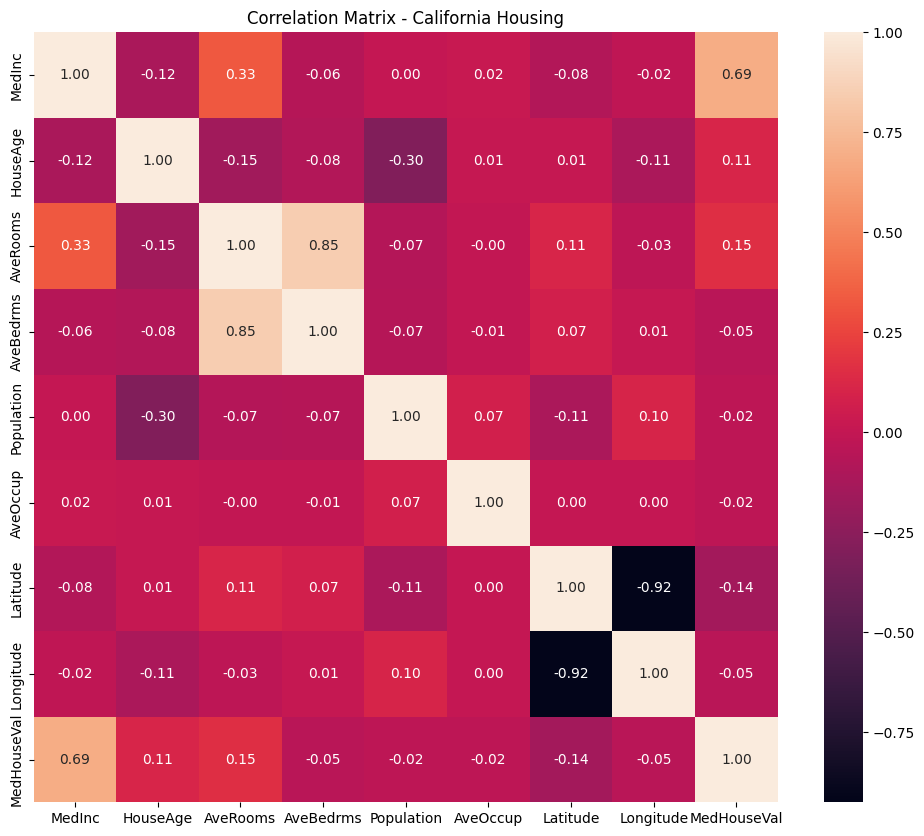

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:45:28   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

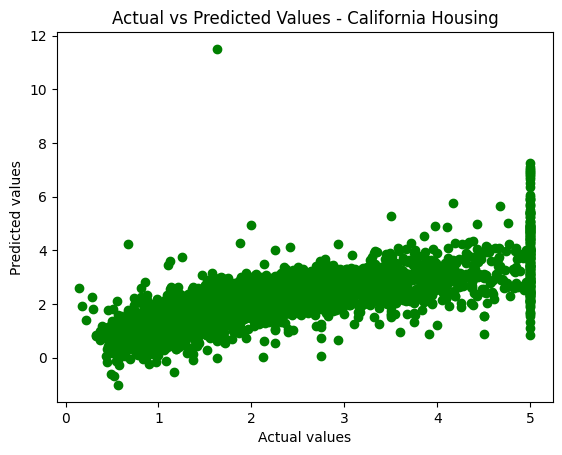

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from scipy import stats

# Load the California housing dataset
california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Display dataset information
print("California Housing dataset head:")
print(df_california.head())

# Correlation matrix to examine relationships between variables
plt.figure(figsize=(12, 10))
sns.heatmap(df_california.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix - California Housing")
plt.show()

# Splitting the dataset
X_california = df_california.drop('MedHouseVal', axis=1)
y_california = df_california['MedHouseVal']
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Adding a constant to the model (for intercept)
X_train_california_sm = sm.add_constant(X_train_california)

# Fit the regression model using statsmodels
'''
The OLS class (Ordinary Least Squares) from statsmodels is used to fit linear regression models.
The method sm.OLS(y, X).fit() creates a model object and fits it to the data.
y is the dependent variable, and X is the independent variable(s), including the constant.
'''
model = sm.OLS(y_train_california, X_train_california_sm).fit()

# Print the summary of the regression model
print(model.summary())

# Get the p-values for the hypothesis test for each coefficient
p_values = model.pvalues
print("\nP-values for hypothesis testing of coefficients:")
print(p_values)

# Evaluate the significance of each coefficient
# If p-value is less than 0.05, we reject the null hypothesis (that the coefficient is zero)

significant_variables = p_values[p_values < 0.05].index
print("\nSignificant variables at 5% significance level:")
print(significant_variables)

# Predicting and evaluating the model
model_california = LinearRegression()
model_california.fit(X_train_california, y_train_california)
y_pred_california = model_california.predict(X_test_california)

mse_california = mean_squared_error(y_test_california, y_pred_california)
r2_california = r2_score(y_test_california, y_pred_california)

print("\nCalifornia Housing Model Performance:")
print(f"Mean Squared Error: {mse_california}")
print(f"R-squared: {r2_california}")

# Scatter plot for actual vs predicted values
plt.scatter(y_test_california, y_pred_california, color='green')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values - California Housing')
plt.show()


Performing Logrithmic Test

California Housing dataset head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


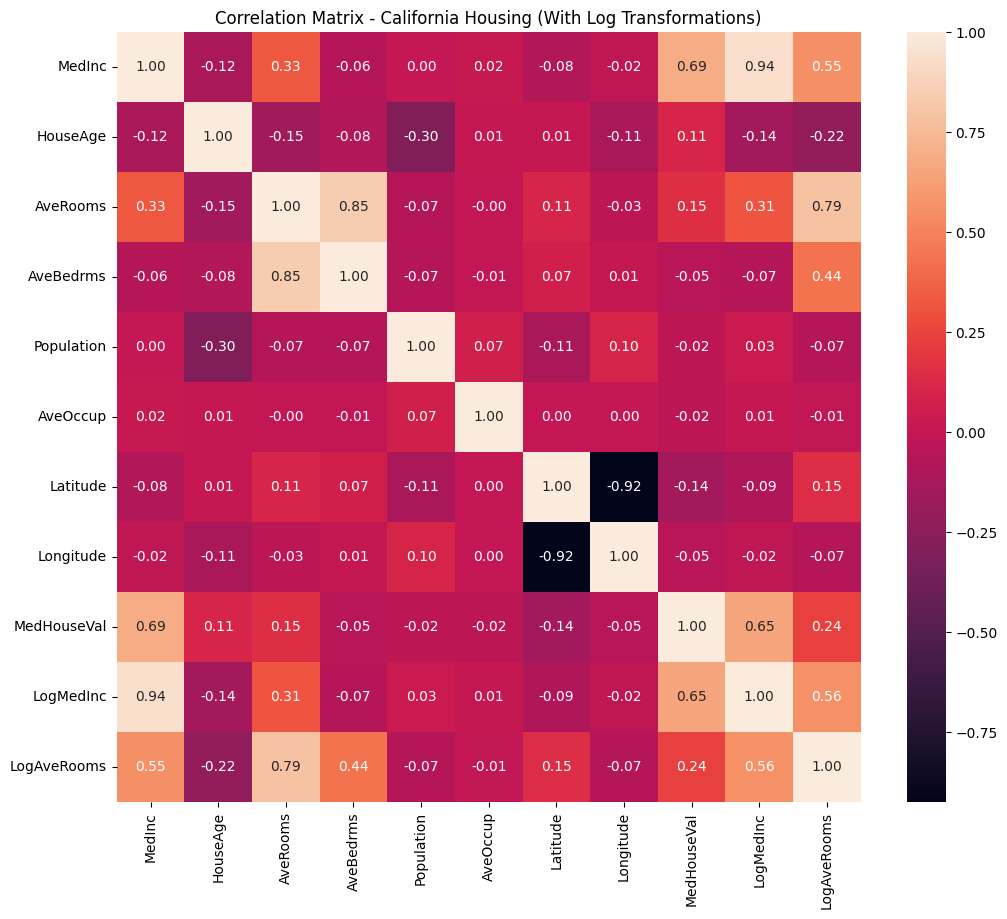

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     6728.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:47:18   Log-Likelihood:                -20904.
No. Observations:               16512   AIC:                         4.181e+04
Df Residuals:                   16509   BIC:                         4.184e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0060      0.041     24.486      

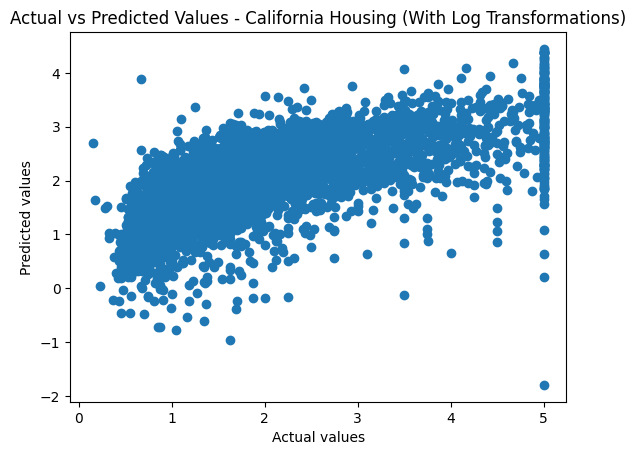

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

# Display dataset information
print("California Housing dataset head:")
print(df_california.head())

# Applying logarithmic transformation to some features
# This is useful if the relationship between the variables and the target is non-linear
df_california['LogMedInc'] = np.log(df_california['MedInc'])
df_california['LogAveRooms'] = np.log(df_california['AveRooms'])

# Correlation matrix to examine relationships between transformed variables and target
plt.figure(figsize=(12, 10))
sns.heatmap(df_california.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix - California Housing (With Log Transformations)")
plt.show()

# Splitting the dataset
# We use the transformed features for the regression
X = df_california[['LogMedInc', 'LogAveRooms']]
y = df_california['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the regression model using statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression model
print(model.summary())

# Predicting and evaluating the model using transformed features
model_california = LinearRegression()
model_california.fit(X_train, y_train)
y_pred = model_california.predict(X_test)

mse_california = mean_squared_error(y_test, y_pred)
r2_california = r2_score(y_test, y_pred)

print("\nCalifornia Housing Model Performance (With Log Transformations):")
print(f"Mean Squared Error: {mse_california}")
print(f"R-squared: {r2_california}")

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values - California Housing (With Log Transformations)')
plt.show()


**Chi Square Test**

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: A contingency table of observed counts
#          Category A   Category B
# Group 1      30           10
# Group 2      35           20
data = [[30, 10],
        [35, 20]]

# Creating the DataFrame (for visualization)
df = pd.DataFrame(data, columns=['Category A', 'Category B'], index=['Group 1', 'Group 2'])
print(df)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Counts:")
print(expected)

# Interpret the results based on p-value
if p < 0.05:
    print("There is a significant association between the groups and categories.")
else:
    print("There is no significant association between the groups and categories.")


         Category A  Category B
Group 1          30          10
Group 2          35          20
Chi-Square Value: 0.9080638111888111
P-Value: 0.3406286690186399
Degrees of Freedom: 1
Expected Counts:
[[27.36842105 12.63157895]
 [37.63157895 17.36842105]]
There is no significant association between the groups and categories.


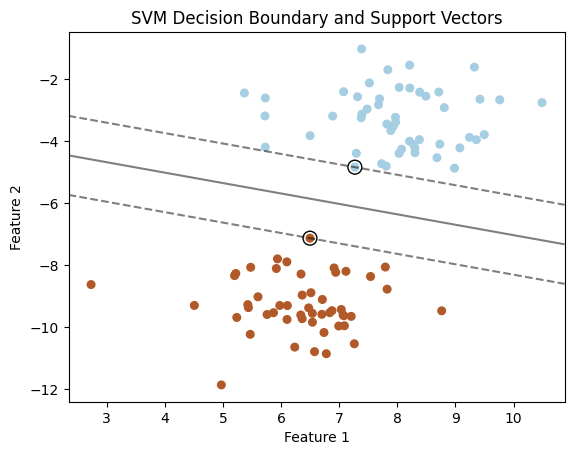

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load a simple dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Create a linear SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plotting the decision boundary
ax = plt.gca()  # Get the current axes, creating a reference to the plot's axes

xlim = ax.get_xlim()  # Get the current limits for the x-axis (min and max x-value)
ylim = ax.get_ylim()  # Get the current limits for the y-axis (min and max y-value)

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)  # Generate 30 evenly spaced points between the min and max x-values
yy = np.linspace(ylim[0], ylim[1], 30)  # Generate 30 evenly spaced points between the min and max y-values

YY, XX = np.meshgrid(yy, xx)  # Create a meshgrid: 2D arrays of x and y coordinates

xy = np.vstack([XX.ravel(), YY.ravel()]).T  # Stack the x and y coordinates in a 2D array, where each row is an (x, y) pair

Z = clf.decision_function(xy).reshape(XX.shape)  # Evaluate the SVM decision function on the grid points and reshape the result to match the grid

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Support Vectors')
plt.show()
